# ROS ALE Figure 3

Generates Figure 3 from the manuscript "Lab evolution and advanced data analytics reveal systems biology of ROS tolerance" by Kevin Rychel et al., 2022.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-Up" data-toc-modified-id="Set-Up-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set Up</a></span></li><li><span><a href="#Generate-Figure" data-toc-modified-id="Generate-Figure-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Generate Figure</a></span></li></ul></div>

## Set Up

In [1]:
# use py file to set up workspace
from src.ros_ale_functions import *

# load data
ica = load_json_model('input/precise1k_kr.json')
ros_meta = pd.read_csv('input/ros_ale_p1k_metadata.csv',
                       index_col = 0)
mutations = pd.read_excel('input/ros_ale_mutations.xlsx',
                          index_col = 0)

# these files are needed for panels A and B
gff_1_0 = 'input/genome_coverage/1_0_reference.gff'
gff_3_0 = 'input/genome_coverage/3_0_reference.gff'

# this will be needed for panel F
label_path = 'input/mutation_table_labels/3F_transporters.csv'
transporter_labels = pd.read_csv(label_path, index_col = 0)

## Generate Figure

Final touches were added in Adobe Illustrator.

/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/kevin/anaconda3/envs/py38env/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


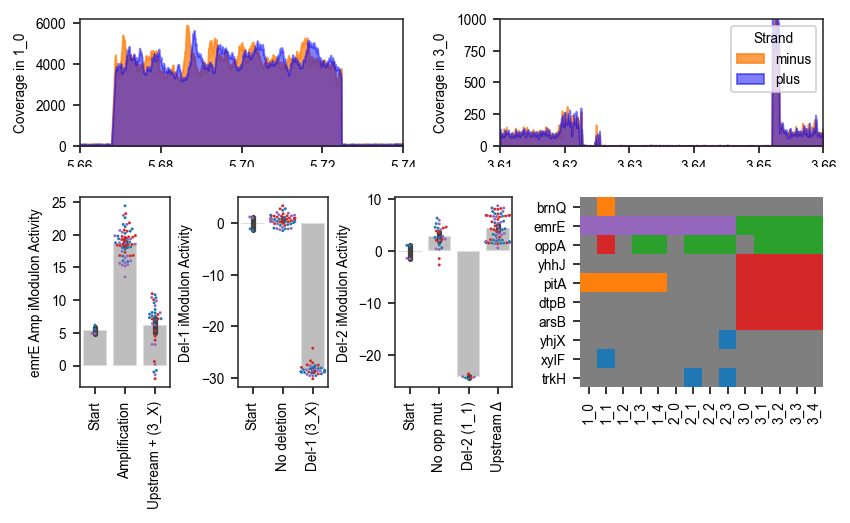

In [2]:
# layout for figure
fig = plt.figure(figsize = (6.85, 3), dpi = 140)
subfigs = fig.subfigures(2, 1, height_ratios = [1, 1.5])
top_axs = subfigs[0].subplots(1, 2, 
            gridspec_kw = {'wspace': 0.3})
btm_axs = subfigs[1].subplots(1, 4, 
            gridspec_kw = {'width_ratios': [1, 1, 1.3, 2.7],
                           'wspace': 0.5})

# draw plots
# genome coverage A-B
genome_plot(gff_1_0, 566000, 574000, ylabel = 'Coverage in 1_0', 
            ax = top_axs[0], legend = False)
genome_plot(gff_3_0, 3610000, 3660000, ylabel = 'Coverage in 3_0', 
            ax = top_axs[1], ymax = 1000)

# emrE C
emrE_dict = {'Start':['0_0'],
           'Amplification':['1_0', '1_1', '1_2', '1_3', '1_4',
                            '2_0', '2_1', '2_2', '2_3'],
           'Upstream + (3_X)': ['3_0', '3_1', '3_2', '3_3', '3_4']}
im_bar_swarm(ica, ros_meta, 'ROS TALE Amp', strain_dict = emrE_dict,
             ax = btm_axs[0], dodge = False)
btm_axs[0].set_ylabel('emrE Amp iModulon Activity')

# del-1 D
del1_dict = {'Start':['0_0'],
           'No deletion':['1_0', '1_1', '1_2', '1_3', '1_4',
                            '2_0', '2_1', '2_2', '2_3'],
           'Del-1 (3_X)': ['3_0', '3_1', '3_2', '3_3', '3_4']}
im_bar_swarm(ica, ros_meta, 'ROS TALE Del-1', strain_dict = del1_dict,
             ax = btm_axs[1], dodge = False)
btm_axs[1].set_ylabel('Del-1 iModulon Activity')

# del-2 E
del2_dict = {'Start': ['0_0'],
             'No opp mut': ['1_0', '1_2', '2_0', '3_0'],
             'Del-2 (1_1)': ['1_1'],
             'Upstream Δ': ['1_3', '1_4', '2_1', '2_2',
                            '2_3', '3_1', '3_2', '3_3', '3_4']}
im_bar_swarm(ica, ros_meta, 'ROS TALE Del-2', strain_dict = del2_dict,
             ax = btm_axs[2], dodge = False)
btm_axs[2].set_ylabel('Del-2 iModulon Activity')

# transporter mutations F
transporters = ['brnQ', 'emrE', 'oppA', 'yhhJ', 'pitA', 'dtpB',
                'arsB', 'yhjX', 'xylF', 'trkH']
_, mut_table = mut_color_table(mutations, ros_meta,
                               transporters, transporter_labels,
                               btm_axs[3])

plt.savefig('output/fig3_raw.pdf')

In [3]:
# used mut_table to add labels to panel F
mut_table

,1_0,1_1,1_2,1_3,1_4,2_0,2_1,2_2,2_3,3_0,3_1,3_2,3_3,3_4
brnQ,,Δ1 bp,,,,,,,,,,,,
emrE,amp,amp,amp,amp,amp,amp,amp,amp,amp,ups +,ups +,ups +,ups +,ups +
oppA,,Δ,,ups Δ,ups Δ,,ups Δ,ups Δ,ups Δ,,ups Δ,ups Δ,ups Δ,ups Δ
yhhJ,,,,,,,,,,Δ,Δ,Δ,Δ,Δ
pitA,+T,+T,+T,+T,+T,,,,,Δ,Δ,Δ,Δ,Δ
dtpB,,,,,,,,,,Δ,Δ,Δ,Δ,Δ
arsB,,,,,,,,,,Δ,Δ,Δ,Δ,Δ
yhjX,,,,,,,,,P326L,,,,,
xylF,,Q187*,,,,,,,,,,,,
trkH,,,,,,,G141R,,P151T,,,,,
